# PDF Mining Basics

This document serves as a guide to introductory PDF mining, as well as an attempt to compile methods and/or code from other sources that have been useful in understanding this method of text extraction.

This interactive tutorial:
* **compares** PyPDF2 and pdfminer.six, two libraries useful in PDF mining
* **provides** examples of the functionality of the two libraries
* **provides** some resources for using PyPDF2 and pdfminer.six, as well as resources for getting started with PDF mining in R and setting up an environment to work in

We'll begin with using [PyPDF2](https://pythonhosted.org/PyPDF2/About%20PyPDF2.html).

## Using PyPDF2

To begin using PyPDF2, we must first import it.

In [ ]:
# importing required modules 
import PyPDF2 

# DON'T FORGET TO RUN THE YOUR CELLS!!

Next, we have to tell PyPDF2 what file to use. Whether you are using a Jupyter Notebook or using the Command Prompt/Terminal locally, **be sure that your file(s) are with your Notebook file or that you are working in the same directory as your file(s) by ```cd``` or changing the directory**.

The file used for the examples below can be found [here](https://libraries.ucsd.edu/farmworkermovement/essays/essays/CESAR%20CHAVEZ%20COMMONWEALTH%20SPEECH.pdf) (link to PDF file titled Cesar Chavez, “Commonwealth Club Address 1984”). Locally, I have renamed the file to remove the spaces, **"CESARCHAVEZCOMMONWEALTHSPEECH.pdf,"** as it seems to work better when running commands.

In [ ]:
# creating a pdf file object 
pdfFileObj = open('CESARCHAVEZCOMMONWEALTHSPEECH.pdf', 'rb')

# FYI, 'rb' means to open the file in a 'read-only' binary format

It then, must be told to read the selected file.

In [ ]:
# creating a pdf reader object 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

We can now, for example, find out the number of pages in this PDF file.

In [ ]:
# printing number of pages in pdf file 
print(pdfReader.numPages)

To actually extract text from the PDF, a PageObject is created and the function getPage(), which takes the page number (starting from index 0) is appended.

In [ ]:
# creating a page object 
pageObj = pdfReader.getPage(0) # be sure to change the number to the appropriate page number for extraction.

Now, we can extract the page text.

In [ ]:
# extracting text from page 
print(pageObj.extractText())

As you can from running the example, the commands worked as they were supposed to. Unfortunately, the output is not very useful without proper spacing. This is a known issue in PyPDF2 and workarounds have been created but did not work in this case. Using PyPDF4 (```pip install PyPDF4```; code lines work the same way as in 2, just change 2 to 4.) provided the same result. 

That is not to say that PyPDF2/PyPDF4 is not useful...just not for this document. In addition to extracting the text of a PDF, PyPDF can also extract document information, rotate pages, merge/split pages, add watermarks, and encrypt the document.

To try another document, be sure to close the current open document.

In [ ]:
pdfFileObj.close()

Interestingly, a PyPDF2 tutorial creator managed to find a PDF that PyPDF2 could better: a [W-9 form](https://www.irs.gov/pub/irs-pdf/fw9.pdf). The output is much cleaner than the previous example, but still a bit hard to decipher without the form fields in place.

In [ ]:
import PyPDF2 

pdfFileObj = open('fw9.pdf', 'rb') 

pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 

pageObj = pdfReader.getPage(0) 

print(pageObj.extractText()) 

# BONUS: Using PyPDF2 with a PDF URL

The process of using a PDF URL instead of a local PDF file is similar with the exception of having to ensure that the PDF file used is in the same place as your notebook file. Instead of 'open', there is a 'request'. Below, is an example of mining the entire PDF from our earlier example.

In [ ]:
import urllib.request # be sure to check if this is installed
import PyPDF2
import io

URL = 'https://libraries.ucsd.edu/farmworkermovement/essays/essays/CESAR%20CHAVEZ%20COMMONWEALTH%20SPEECH.pdf' #feel free to change URL
req = urllib.request.Request(URL, headers={'User-Agent' : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"})
remote_file = urllib.request.urlopen(req).read()
remote_file_bytes = io.BytesIO(remote_file)
pdfdoc_remote = PyPDF2.PdfFileReader(remote_file_bytes)

for i in range(pdfdoc_remote.numPages):
    current_page = pdfdoc_remote.getPage(i)
    print("===================")
    print("Content on page:" + str(i + 1))
    print("===================")
    print(current_page.extractText())

The second part of the code ```for i in range(pdfdoc_remote.numPages):```, provides formatting for the extracted text. If you simply just want to print the extracted text, you can remove everything between ```current page``` and ```print(current_page.extractText())```. Of course, if you ran the above example, you'll know how well (not really) this will turn out.

In [ ]:
for i in range(pdfdoc_remote.numPages):
    current_page = pdfdoc_remote.getPage(i)
    print(current_page.extractText())

## pdfminer.six

Another popular PDF mining tool for Python is pdfminer.six, which is a fork from the original pdfminer repo. pdfminer.six can do much of what PyPDF2 can do. The bonus is that it can also extract images (see later example).

To begin, we must (of course) import pdfminer.

In [ ]:
import pdfminer

Then, the extract text function must be imported.

In [ ]:
import pdfminer.high_level
from pdfminer.high_level import extract_text

Next, the PDF file is defined.

In [ ]:
text = extract_text("CESARCHAVEZCOMMONWEALTHSPEECH.pdf")

And finally, the output of the extracted text is printed.

In [ ]:
print(text)

After running ```print```, it is clear that pdfminer.six does a better job in this case of extracting the text.

# BONUS: Using pdfminer.six with a PDF URL

Similar to the code for PyPDF, urllib and io are used to request the necessary PDF.

In [ ]:
import urllib.request # be sure to check if this is installed
import pdfminer
import io # be sure to check if this is installed
from pdfminer.high_level import extract_text

URL = 'https://libraries.ucsd.edu/farmworkermovement/essays/essays/CESAR%20CHAVEZ%20COMMONWEALTH%20SPEECH.pdf' #feel free to change URL
req = urllib.request.Request(URL, headers={'User-Agent' : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"})
remote_file = urllib.request.urlopen(req).read()
remote_file_bytes = io.BytesIO(remote_file)
text = extract_text(remote_file_bytes)

print(text)

Again, pdfminer.six does a better job formatting the extracted text.

Now, let's move on to extracting images.

The process for extracting images is slightly more involved than the text extraction process. pdfminer.six provides steps to do this:

```curl https://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf --output example.pdf``` 

```pdf2txt.py example.pdf --output-dir cats-and-dogs```

**Please note:** ```pdf2txt.py``` is included in the pdfminer.six package. Unfortunately, it may not be saved in the same directory that you are working in. To remedy any errors, I suggest making a copy of the file and placing it in the directory you plan to work in.

These commands only work in the command line. If you have been following along in Jupyter Notebook, Google Colab, etc., you *won't* need to open up the Command Prompt/Terminal to follow this process. By simply prefacing the command with ```!``` (exclamation mark) on the line, it will run the command as it would on this command line. Alternatively, as it pertains to this process, you can install pycurl ```pip install pycurl``` to request a URL in Python.

Here is an example of using pycurl to request and download an example PDF:

```Python
import pycurl

file_name = 'example.pdf'
file_src = 'https://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf --output example.pdf'

with open(file_name, 'wb') as f:
    cl = pycurl.Curl()
    cl.setopt(cl.URL, file_src)
    cl.setopt(cl.WRITEDATA, f)
    cl.perform()
    cl.close()
```

Below, the command to extract images from the "Commonwealth Speech" PDF file will be entered and run as a command.

In [ ]:
# The --output-dir argument creates the directory (folder) where the image(s) will ultimately go. Be sure to name the directory something that makes sense.
! pdf2txt.py CESARCHAVEZCOMMONWEALTHSPEECH.pdf --output-dir fw-images

If the command ran without errors, you should see the folder "fw-images" in your working directory. Within that folder, the sole image (located on the first page) should be there as a .BMP or bitmap image file. Success! 🎉 Unfortunately, if you tried opening the image, you may have received an error. I received, **"Sorry, [Windows] Photos can't open this file because the format is currently unsupported, or the file is corrupted"**.

After entering the file in an online BMP image viewer, I saw the problem:

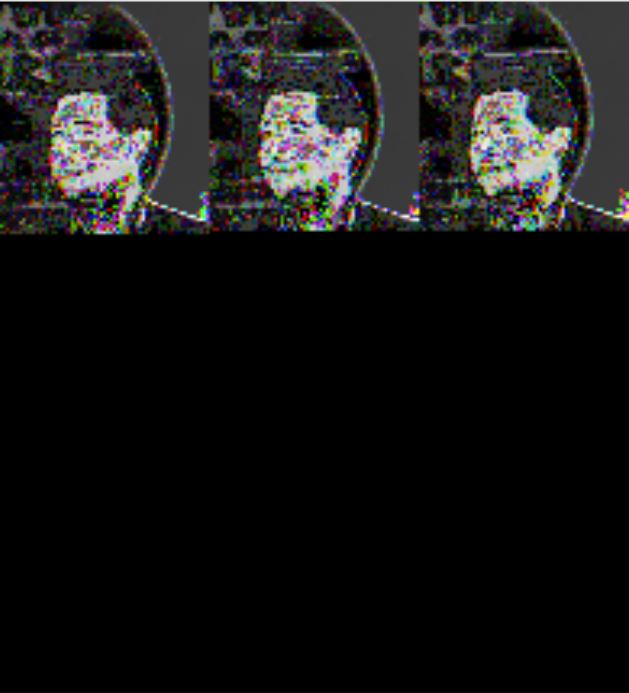

That is definitely **NOT** how the image should look. This could be due to a number of things, including any conversion issues, whether from the PDF or pdfminer.six extracting the image. Let's try another [example](https://www.learningcontainer.com/wp-content/uploads/2019/09/sample-pdf-with-images.pdf). Interestingly, the "cats-and-dogs" example provided by pdfminer.six works as expected on the command line, but a particular character (\uFB01, to be exact) trips up reading/extraction in Jupyter Notebook.

In [ ]:
# retrieves and downloads a copy of the PDF
! curl https://www.learningcontainer.com/wp-content/uploads/2019/09/sample-pdf-with-images.pdf --output example.pdf

In [ ]:
# extracts image(s) from PDF and creates/outputs to maps-satellites folder
! pdf2txt.py example.pdf --output-dir maps-satellites

If all goes as planned, there should be both a PDF document named "example.PDF", and a folder named "maps-satellites" with four *non-corrupted* images.

## A Quick Word About Environments

With any kind of project, it is good practice to keep its components together, and that is very much true for your PDF mining project. Here are some resources for setting up an environment for both Python and R. Once you have your environment created, you can place any downloaded PDFs in a folder within the environment folder.

### Python
* [How To Install and Set Up a Local Programming Environment for Python 3](https://www.digitalocean.com/community/tutorial_series/how-to-install-and-set-up-a-local-programming-environment-for-python-3)

### R
* [renv (Overview)](https://rstudio.github.io/renv/)
* [Introduction to renv](https://rstudio.github.io/renv/articles/renv.html)


## Resources

The following resources were used to as an entry to PDF mining. Included are links for tutorials on PDF mining using both Python and R. The tutorials for Python have been tested and used and will be employed as examples in this guide. The R tutorials have not been actively tested, but are included as reference. **Please Note:** the libraries/packages here are just *a few* that are available for PDF text extraction. These libraries/packages are more commonly used/referenced/popular.

### Python
* PyPDF2 ```pip install PyPDF2```
* [PyPDF2 Documentation](https://pythonhosted.org/PyPDF2/)
* [An Intro to PyPDF2](https://www.blog.pythonlibrary.org/2018/06/07/an-intro-to-pypdf2/)
* [Extract text from PDF File using Python](https://www.geeksforgeeks.org/extract-text-from-pdf-file-using-python/)
* [Excerpt of "Working with PDF and Word Documents" from the book *Automate the Boring Stuff with Python*](https://automatetheboringstuff.com/2e/chapter15/)
* [How to Work With a PDF in Python](https://realpython.com/pdf-python/)
* [How to Extract Keywords from PDFs and Arrange in Order of their Weights Using Python](https://towardsdatascience.com/how-to-extract-keywords-from-pdfs-and-arrange-in-order-of-their-weights-using-python-841556083341)


* pdfminer.six (maintained fork of pdfminer) ```pip install pdfminer.six```
* [pdfminer.six Documentation](https://pdfminersix.readthedocs.io/en/latest/)
* [How to Read PDF Files Using Python (using pdfminer.six)](http://theautomatic.net/2020/01/21/how-to-read-pdf-files-with-python/)

### R
* Main library (depending on the project/output, other libraries/dependencies will need to be installed) 
```R
library(pdftools)
```
* [Extracting Data from a PDF into R](https://rstudio-pubs-static.s3.amazonaws.com/415060_553527fd13ed4f30aae0f1e4483aa970.html)
* [Mining Data From PDF Files with R](https://rpubs.com/SavvyAnalytics/pdfdemo)
* [Reading PDF Files into R for Text Mining](https://data.library.virginia.edu/reading-pdf-files-into-r-for-text-mining/)
* [How to Extract and Clean Data From PDF Files in R](https://www.charlesbordet.com/en/extract-pdf/#)

## Conclusion

Hopefully, this notebook will serve as a suitable entry to PDF mining. To learn more about the all features of PyPDF2 and pdfminer.six, please refer to the documentation provided under the 'Resources' section of this notebook.

Please reach out to me if there are any issues with running the notebook, have any questions (I'm no expert, but I have no problem with providing assistance in working out issues), and/or know of any other libraries/packages in Python or R that are useful for PDF mining: **Ateanna Uriri** • [ateanna.uriri[at]utrgv.edu](mailto:ateanna.uriri@utrgv.edu) • [aouriri](https://github.com/aouriri) on GitHub